### Amazon customers data analysis

Link to the data can be found in the readme file.

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [2]:
#create a connection to the database file
conn = sqlite3.connect('/Users/st__morris/dirr/Amazon customer analysis/database.sqlite')

In [3]:
type(conn)

sqlite3.Connection

In [4]:
#read the data
df = pd.read_sql_query('SELECT * FROM Reviews', conn)

In [5]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
df.shape

(568454, 10)

## Perform sentiment analysis with TextBlob

##### 1) positive sentiment
##### 2) Negative sentiment

#!pip install TextBlob

In [7]:
from textblob import TextBlob

In [8]:
text = df['Summary'][0]

In [9]:
#perform sentiment analysis
TextBlob(text).sentiment.polarity

0.7

In [10]:
polarity = []
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)


In [11]:
len(polarity)

568454

In [12]:
data = df.copy()

In [13]:
data['Polarity'] = polarity

In [14]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

### Perform EDA sentences with positive sentiment

In [15]:
data_positive = data[data['Polarity']> 0]

In [16]:
data_positive.shape

(331665, 11)

#### Analysis on keywords users emphasize using wordcloud. 

In [17]:
#!pip install wordcloud

In [18]:
from wordcloud import WordCloud,STOPWORDS 
#he she it they than is him her

In [19]:
#create unique stopwords
stopwords = set(STOPWORDS)

In [20]:
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000

In [21]:
total_text = ' '.join(data_positive['Summary'])

In [22]:
len(total_text)

8465012

In [23]:
total_text[:10000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [24]:
#to remove elipsis and other signs, clean text data
import re

#substitute function
#accept a-zA-Z and whatever else turn into space
total_text = re.sub('[^a-zA-Z]',' ', total_text)

In [25]:
#further clean the data
#anywhere with more than one space replace with one space
total_text = re.sub(' +', ' ', total_text)

In [26]:
total_text[:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

Text(0.5, 1.0, 'Positive keywords')

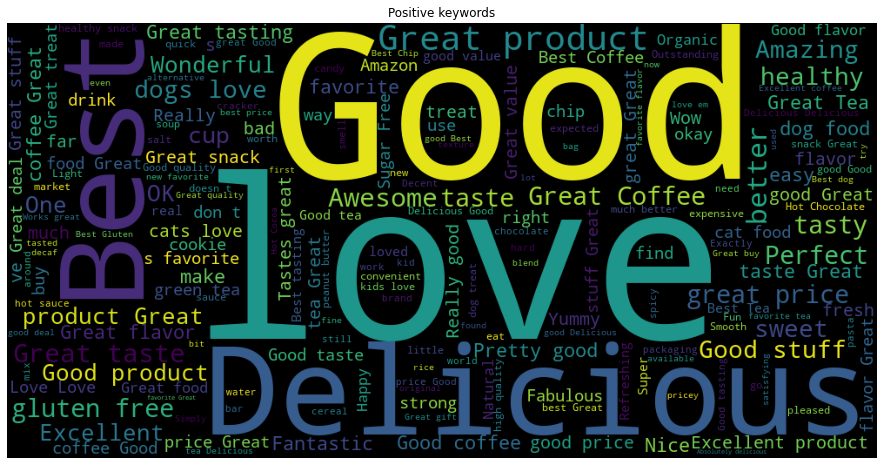

In [27]:
#visualize
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(total_text)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive keywords')

- Keywords that are highly prioritized.
- This shows the keywords that customers mostly use.

### Perform EDA sentences with negative sentiment

In [28]:
data_negative = data[data['Polarity']< 0]

In [29]:
total_text2 = ' '.join(data_negative['Summary'])

In [30]:

total_text2 = re.sub('[^a-zA-Z]',' ', total_text2)

In [31]:
total_text2

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [32]:
#excess space into single space
total_text2 = re.sub(' +', ' ', total_text2)

In [33]:
total_text2

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

Text(0.5, 1.0, 'Negative keywords')

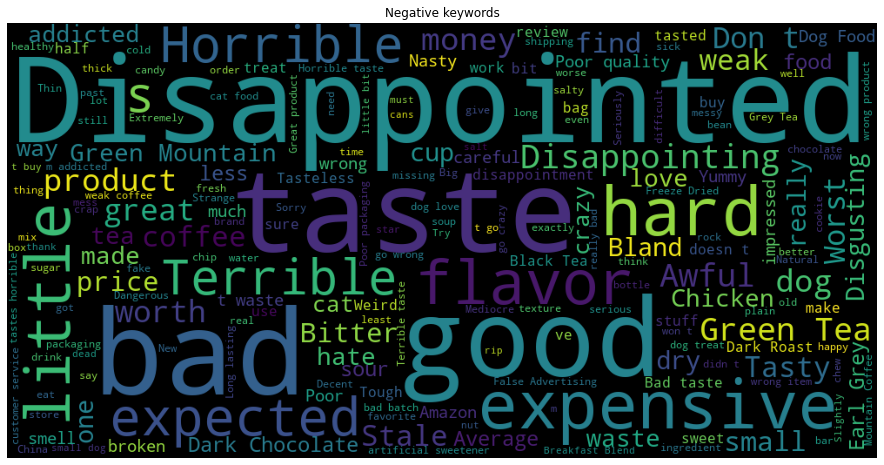

In [34]:
wordcloud2 = WordCloud(width = 1000, height = 500, stopwords = stopwords).generate(total_text2)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Negative keywords')

## Analysis on what user amazon can recommend more products to.

In [35]:
df['UserId'].nunique()

256059

In [36]:
cust_freq = df.groupby('UserId').agg({'Summary': 'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(by = 'Text', ascending = False)


In [37]:
cust_freq.columns=['number_of_summaries', 'num_text', 'avg_score', 'no_of_products_purchased']

In [38]:
cust_freq.head()

number_of_summaries  num_text  avg_score  \
UserId                                                     
A3OXHLG6DIBRW8                  448       448   4.535714   
A1YUL9PCJR3JTY                  421       421   4.494062   
AY12DBB0U420B                   389       389   4.647815   
A281NPSIMI1C2R                  365       365   4.841096   
A1Z54EM24Y40LL                  256       256   4.453125   

                no_of_products_purchased  
UserId                                    
A3OXHLG6DIBRW8                       448  
A1YUL9PCJR3JTY                       421  
AY12DBB0U420B                        389  
A281NPSIMI1C2R                       365  
A1Z54EM24Y40LL                       256

In [39]:
user_10 = cust_freq.index[:10]

In [40]:
num_10 = cust_freq['no_of_products_purchased'][:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

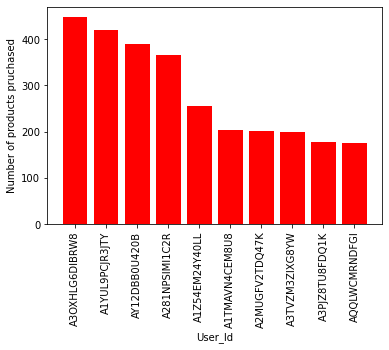

In [41]:
plt.bar(user_10, num_10, label = 'most recommended users', color = 'red')
plt.xlabel('User_Id')
plt.ylabel('Number of products pruchased' )
plt.xticks(rotation = 'vertical')

##### *Top 10 users, we can recommend products to these users as there is a high probability that they will buy the products.*

## Analyse length of comments, to know if customers are going to give lengthy comments or short ones

In [42]:
#because the data is huge, we can decide to take a sample of it to analyse feedback
#df.sample(n=2000)
final = df[0:2000]

In [43]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [44]:
#check for missing values
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [45]:
#check for duplicates
final.duplicated().sum()

0

In [46]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [47]:
#length of feedback
len(final['Text'][0].split(' '))

49

In [48]:
def calc_len(text):
    return len(text.split(' '))
    

In [49]:
final['Text_length'] = final['Text'].apply(calc_len)

In [50]:
import plotly.express as px

In [51]:
px.box(data_frame = final,
      y = 'Text_length')

##### *It seems to have almost 50% users will give feedbck with almost 50 words, there are only few users who are going give lengthy feedbacks.*

### Analysis on the score

In [52]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

<AxesSubplot:xlabel='Score', ylabel='count'>

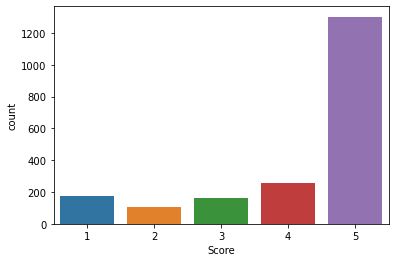

In [53]:
sns.countplot(final['Score'])

##### *Most of the customers are going to give us 5 on any of the products.*

## Analysis on the behavious of customers

#### Data Preparation

In [54]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Text_length  
0           49  
1           31  
2           99  
3           43  
4           30

In [55]:
#convert to lowercase
final['Text']= final['Text'].str.lower()

In [56]:
import string
punctuations = string.punctuation

#function removes punctuations
def remove_punc(col):
    no_punc = ''
    for char in col:
        if char not in punctuations:
            no_punc=no_punc + char
    return no_punc        

In [57]:
final['Text'] = final['Text'].apply(remove_punc)

In [58]:
#!pip install nltk

In [59]:
#remove stopwords with NLTK
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [60]:
#function removes stopwords
def remove_stopwords(review):
    return " ".join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])
    

In [61]:
final['Text'] = final['Text'].apply(remove_stopwords)

In [62]:
final['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

In [63]:
#total number of rows that contain http as a substring
final['Text'].str.contains('http').sum()

35

In [64]:
pd.set_option('display.max_rows', 2000)
final['Text'].str.contains('http') 

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [65]:
review = final['Text'][21]
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [66]:
def remove_url(review):
    url_pattern = re.compile(r'href|http.\w+')

    return url_pattern.sub(r'',review)

In [67]:
final['Text'] = final['Text'].apply(remove_url)

In [68]:
final['Text'].str.contains('http').sum()

0

In [69]:
final['Text'][25]

'product received advertisedbr br  strawberry 16ounce bags pack 6a'

In [70]:
comment_words = ' '.join(final['Text']).replace('br','')

In [71]:
from wordcloud import WordCloud,STOPWORDS 

#create unique stopwords
stopwords = set(STOPWORDS)

(-0.5, 799.5, 799.5, -0.5)

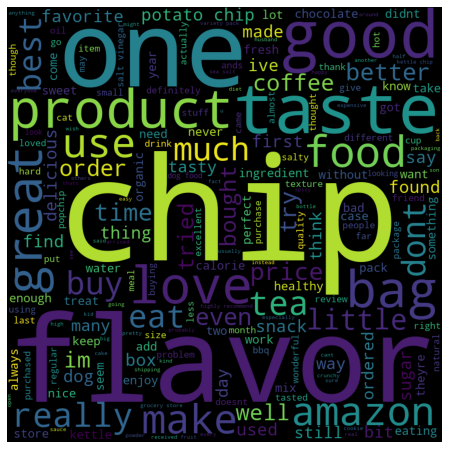

In [72]:
wordcloud1 = WordCloud(width = 800, height = 800, stopwords = stopwords).generate(comment_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud1)
plt.axis('off')

This is exactly the behaviour of the customers. he/she is going to use this keywords most of the time.